In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Donnees_nettoyees_Open_Food')

# Exploration et analyse de données


## Obejtif :
- Comprendre nos données
- Développer une première stratégie de modélisation


## Checklist de Base
### Analyse de fond :
- Visualisation de la target :
- Signification des variables :
- Relation Variables / Target :



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   product_name        4705 non-null   object 
 2   energy_100g         5000 non-null   float64
 3   fat_100g            5000 non-null   float64
 4   carbohydrates_100g  5000 non-null   float64
 5   proteins_100g       5000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 234.5+ KB


In [6]:
df.head()

,Unnamed: 0,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,0,Vitória crackers,1569.000000,7.00000,70.100000,7.800000
1,1,Cacao,1402.291696,16.47351,36.245963,8.997708
2,2,Filetes de pollo empanado,1402.291696,16.47351,36.245963,8.997708
3,3,Hamburguesas de ternera 100%,3661.000000,15.10000,2.600000,15.700000
4,4,moutarde au moût de raisin,936.000000,8.20000,29.000000,5.100000


In [7]:
del df['Unnamed: 0']

In [8]:
df.head()

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,Vitória crackers,1569.000000,7.00000,70.100000,7.800000
1,Cacao,1402.291696,16.47351,36.245963,8.997708
2,Filetes de pollo empanado,1402.291696,16.47351,36.245963,8.997708
3,Hamburguesas de ternera 100%,3661.000000,15.10000,2.600000,15.700000
4,moutarde au moût de raisin,936.000000,8.20000,29.000000,5.100000


### Analyse Univarié

#### Histogrammes des variables continues

C:\Users\Zakaria\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zakaria\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zakaria\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

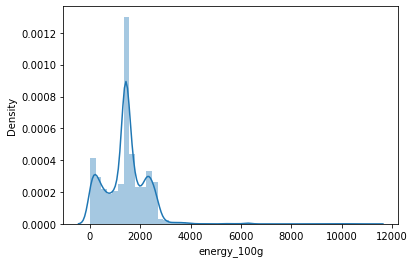

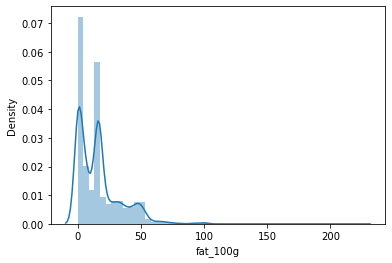

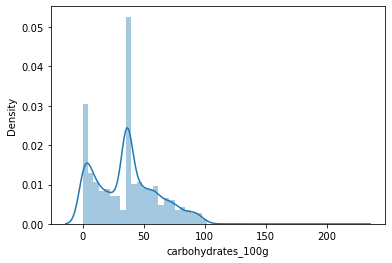

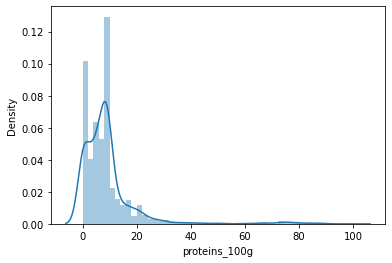

In [9]:
for col in df.select_dtypes('float64'):
    plt.figure()
    sns.distplot(df[col])


On remarque tout de suite qu'aucune de ces distributions n'est centré en 0 et semble pas avoir d'écart-type égale à 1. Donc elles n'ont pas été standardisées

On voit aussi que ce sont toutes des distribution asymétriques (skewed)

In [47]:
for col in df.select_dtypes('float64'):
    print(col,'\n\tMinimum : ',df[col].min(), '\n\tMaximun : ', df[col].max(), '\n\tMoyenne :', df[col].mean(), '\n\tEcart-type : ', df[col].std(),'\n')

energy_100g 
	Minimum :  0.0 
	Maximun :  11188.0 
	Moyenne : 1402.2916958042092 
	Ecart-type :  831.3608098441664 

fat_100g 
	Minimum :  0.0 
	Maximun :  222.0 
	Moyenne : 16.473510474800655 
	Ecart-type :  17.17208202719659 

carbohydrates_100g 
	Minimum :  0.0 
	Maximun :  222.0 
	Moyenne : 36.245962778416285 
	Ecart-type :  25.06852924968228 

proteins_100g 
	Minimum :  0.0 
	Maximun :  100.0 
	Moyenne : 8.997707623677043 
	Ecart-type :  11.337093206141375 



In [8]:
print("Quantité Energie max : ", 4*100 + 4*100+ 9*100)

Quantité Energie max :  1700


#### boxplots des variables continues

C:\Users\Zakaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Zakaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Zakaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Zakaria\anaconda

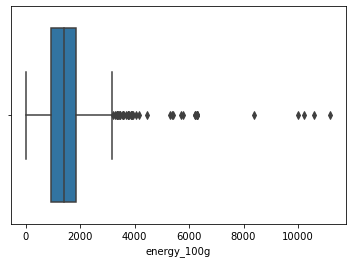

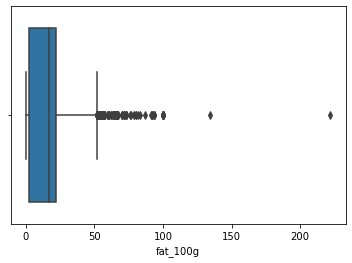

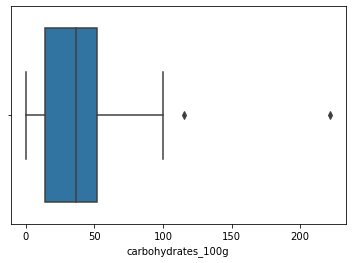

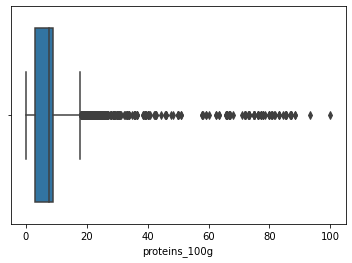

In [48]:
for col in df.select_dtypes('float64'):
    plt.figure()
    sns.boxplot(df[col])

Sachant que la quantité de proteine dans 100 g d'un produit ne peut dépasser 100g, la visualisation de boite à moustache des colonnes nous permet de voir qu'on a des valeurs aberrantes dans la colonne carbohydrate_100g, fat_100g

Puis que notre choix des variables est motivé la formule de calcul de l'energie suivant : protéines * 4 + carbohydrates * 4 + fat * 9,

Donc la valeur maximale de l'energie 100g d'un produit ne peut dépasser 4*max(proteines) + 4*max(carbohydrate) + 9*max(fat) c'est à dire 1700.

Donc on observe aussi des valeurs aberrantes dans la colonnes energy_100g

On verra la gestion des valeurs aberrantes tout à l'heure

## Analyse Multivariée

<AxesSubplot:>

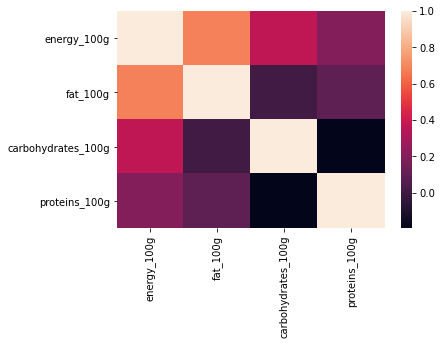

In [49]:
sns.heatmap(df.corr())

## Notre matrice de corrélation nous montre qu'on a :

- **une corrélation à environ 70-80% entre fat_100g et energy_100g
- **40 à 50 % de corrélation (faible) entre carbohydrate_100g et energy_100g
- **une très faible corrélation (20% environ) entre proteines_100g et energy_100g

### Parallèlement au calcul du coefficient de corrélation de Pearson, il convient de représenter les variables sur un graphique pour visualiser leur comportement

Pour cela faisons appel à la fonction pairplot de seaborn

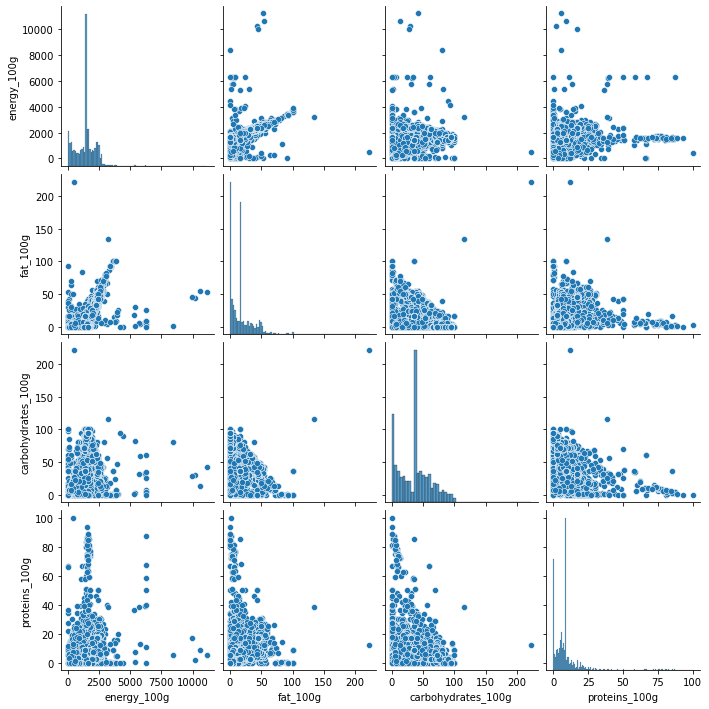

In [13]:
sns.pairplot(df)

La visualisation de notre pairplot nous permet tout de suite de voir qu'on a :

des valeurs aberrantes au niveau de toutes les variables parce qu'on ne peut avoir comme energie d'un produit égale à zéro alors qu'on a l'un des termes définissant sa formule de calcul différent de zéro

des outliers parce qu'on ne peut pas manquer que les qlqs points assez loins des autres qui sont concentrés

## PREPROCESSING, Recherche et Suppression de valeurs aberrantes

In [ ]:
1ere règle :
    toutes les valeurs de nos variables doivent être comprise entre 0 et 100

2eme règle :
    
3eme règle : 
    Si la valeur est supérieur à la valeur maxi possible,
    soit on la supprime, soit on la remet cette val max possible
    
    

In [15]:
df.columns

Index(['product_name', 'energy_100g', 'fat_100g', 'carbohydrates_100g',
       'proteins_100g'],
      dtype='object')

In [16]:
# puis que dans mon analyse univarié j'ai pu constater que toutes ont pour valeur mnimale zero (0)
# je ne gère que des valeurs qui dépassent les 100
df[df.drop(columns=['product_name', 'energy_100g']).apply(lambda x: x <= 100.0).all(axis=1)]

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,Vitória crackers,1569.000000,7.00000,70.100000,7.800000
1,Cacao,1402.291696,16.47351,36.245963,8.997708
2,Filetes de pollo empanado,1402.291696,16.47351,36.245963,8.997708
3,Hamburguesas de ternera 100%,3661.000000,15.10000,2.600000,15.700000
4,moutarde au moût de raisin,936.000000,8.20000,29.000000,5.100000
...,...,...,...,...,...
4995,jolly rancher gummies,1402.291696,16.47351,36.245963,8.997708
4996,Whoppers,586.000000,5.00000,23.000000,1.000000
4997,Hard candy,4158.000000,0.00000,93.750000,0.000000
4998,"All blue raspberry hard candy, blue raspberry",1628.000000,0.00000,94.440000,0.000000


In [17]:
df.shape

(5000, 5)

### Définition des outliers à l'aide des écarts-types

In [5]:
stds = 1.0
outliers = df[df.columns].groupby('product_name').transform(
           lambda group: (group - group.mean()).abs().div(group.std())) > stds


In [154]:
outliers.head()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


### Définir les valeurs de données filtrées et les valeurs atypiques

In [7]:
df_o = df[outliers.values == True]
df_f = df[outliers.values == False]

In [8]:
df_o

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
20,Compote de poire,657.0,0.00,36.00,0.60
20,Compote de poire,657.0,0.00,36.00,0.60
20,Compote de poire,657.0,0.00,36.00,0.60
20,Compote de poire,657.0,0.00,36.00,0.60
211,Almonds,2510.0,50.00,20.00,20.00
...,...,...,...,...,...
3886,Chocolate and caramel candy,1745.0,16.67,69.44,2.78
3886,Chocolate and caramel candy,1745.0,16.67,69.44,2.78
3886,Chocolate and caramel candy,1745.0,16.67,69.44,2.78
3886,Chocolate and caramel candy,1745.0,16.67,69.44,2.78


In [9]:
df_f

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,Vitória crackers,1569.0,7.0,70.10,7.8
0,Vitória crackers,1569.0,7.0,70.10,7.8
0,Vitória crackers,1569.0,7.0,70.10,7.8
0,Vitória crackers,1569.0,7.0,70.10,7.8
1,Hamburguesas de ternera 100%,3661.0,15.1,2.60,15.7
...,...,...,...,...,...
3919,"All blue raspberry hard candy, blue raspberry",1628.0,0.0,94.44,0.0
3920,"Watermelon hard candy, watermelon",1628.0,0.0,94.44,0.0
3920,"Watermelon hard candy, watermelon",1628.0,0.0,94.44,0.0
3920,"Watermelon hard candy, watermelon",1628.0,0.0,94.44,0.0


In [158]:
#Outlier Treatment

def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [159]:
outlier_detect(df)

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,Vitória crackers,1569.0,7.0,70.10,7.80
1,Hamburguesas de ternera 100%,3661.0,15.1,2.60,15.70
2,moutarde au moût de raisin,936.0,8.2,29.00,5.10
3,Sauce Sweety chili 0%,88.0,0.0,4.80,0.20
4,Mini coco,251.0,3.0,10.00,2.00
...,...,...,...,...,...
3916,Gummies,1289.0,0.0,71.79,5.13
3917,Whoppers,586.0,5.0,23.00,1.00
3918,Hard candy,4158.0,0.0,93.75,0.00
3919,"All blue raspberry hard candy, blue raspberry",1628.0,0.0,94.44,0.00


In [34]:
df[df.drop(columns=['product_name']).apply(lambda x: np.abs(x - x.mean()) / x.std() <= 1.0).all(axis=1)]

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
2,moutarde au moût de raisin,936.0,8.2,29.00,5.10
7,Fromage blanc aux myrtilles,540.0,4.9,16.30,4.40
9,Baguette parisien,929.0,3.3,38.40,11.70
11,&quot;Baguette Lyonnais&quot;,1213.0,9.4,41.00,12.50
12,Solène céréales poulet,916.0,5.9,30.30,9.70
...,...,...,...,...,...
3849,Peanut caramel bar,1933.0,25.0,51.92,13.46
3850,Peanut caramel butter,1933.0,25.0,51.92,13.46
3855,Easter jelly beans,586.0,0.0,36.00,0.00
3860,Jolly rancher chews original flavors assortment,502.0,1.6,27.00,0.00


# ACP

In [18]:
#dimension
print(df.shape) # (18, 6)
#nombre d'observations
n = df.shape[0]
#nombre de variables
p = df.shape[1]
#affichage des données
print(df)


(5000, 5)
                                       product_name  energy_100g  fat_100g  \
0                                  Vitória crackers  1569.000000   7.00000   
1                                             Cacao  1402.291696  16.47351   
2                         Filetes de pollo empanado  1402.291696  16.47351   
3                      Hamburguesas de ternera 100%  3661.000000  15.10000   
4                       moutarde au moût de raisin    936.000000   8.20000   
...                                             ...          ...       ...   
4995                          jolly rancher gummies  1402.291696  16.47351   
4996                                       Whoppers   586.000000   5.00000   
4997                                     Hard candy  4158.000000   0.00000   
4998  All blue raspberry hard candy, blue raspberry  1628.000000   0.00000   
4999              Watermelon hard candy, watermelon  1628.000000   0.00000   

      carbohydrates_100g  proteins_100g  
0          

Nous devons explicitement centrer et réduire les variables pour réaliser une ACP normée
avec PCA de sklearn.

In [19]:
import sklearn

In [20]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df[['energy_100g','fat_100g', 'carbohydrates_100g', 'proteins_100g']])
print(Z)

[[ 2.00544668e-01 -5.51736123e-01  1.35059472e+00 -1.05655602e-01]
 [-2.73523136e-16 -2.06909622e-15  3.40162182e-15 -7.83505291e-16]
 [-2.73523136e-16 -2.06909622e-15  3.40162182e-15 -7.83505291e-16]
 ...
 [ 3.31502746e+00 -9.59415291e-01  2.29410301e+00 -7.93731459e-01]
 [ 2.71519749e-01 -9.59415291e-01  2.32163032e+00 -7.93731459e-01]
 [ 2.71519749e-01 -9.59415291e-01  2.32163032e+00 -7.93731459e-01]]


In [33]:
# VERIFICATION

#moyenne
print('Moyenne : ',np.mean(Z,axis=0))
#écart-type
print('Ecart-type : ',np.std(Z,axis=0,ddof=0))


Moyenne :  [-4.54747351e-17  1.70530257e-16 -9.66338121e-17  1.02318154e-16]
Ecart-type :  [1. 1. 1. 1.]


### On est maintenant paré pour l'ACP

In [35]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')

#affichage des paramètres
print(acp)

PCA(svd_solver='full')


Nous pouvons lancer les traitements dans un second temps. La fonction fit_transform()
renvoie en sortie les coordonnées factorielles Fik que nous collectons dans la variable coord

Nous affichons le nombre de composantes générées (K), il est bien 
égal à p = 4

In [36]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

4


La propriété .explained_variance_ semble faire l’affaire pour obtenir les variances 
(valeurs propres, λk) associées aux axes factoriels.

In [37]:
#variance expliquée
print(acp.explained_variance_)


[1.80948853 1.20969403 0.78375043 0.19786718]


In [38]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.80912663 1.20945209 0.78359368 0.1978276 ]


Nous aurions pu obtenir les bonnes valeurs propres en passant par les valeurs singulières 
.singular_values_ issues de la factorisation de la matrice des données centrées et réduites

In [39]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)


[1.80912663 1.20945209 0.78359368 0.1978276 ]


PCA fournit également les proportions de variance associées aux axes. Il n’est pas nécessaire 
d’effectuer une correction dans ce cas.

In [40]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)


[0.45228166 0.30236302 0.19589842 0.0494569 ]


In [41]:
import matplotlib.pyplot as plt

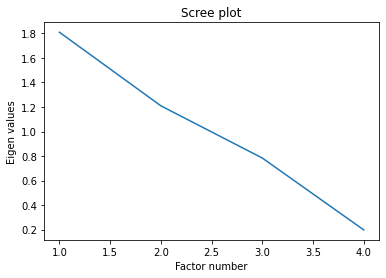

In [42]:
#scree plot
plt.plot(np.arange(1,p),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Le graphique du cumul de variance restituée selon le nombre de facteurs peut être 
intéressant également

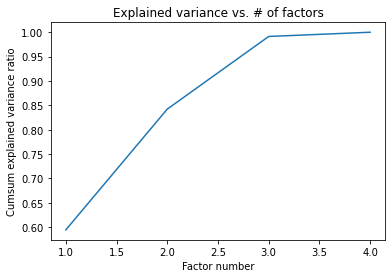

In [87]:
#cumul de variance expliquée
plt.plot(np.arange(1,p),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [59]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p-1,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [43]:
# Forme condensée seuils pour test des bâtons brisés
bs = np.cumsum(1/np.arange(p-1,0,-1))[::-1]

Puis affichons conjointement les valeurs propres et les seuils

In [60]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    1.809127  2.083333
1    1.209452  1.083333
2    0.783594  0.583333
3    0.197828  0.250000


Avec cette procédure, seul le premier facteur est valide. Le cercle des corrélations que nous 
construirons par la suite semble aller dans le même sens.


### Représentation des individus – Outils pour l’interprétation

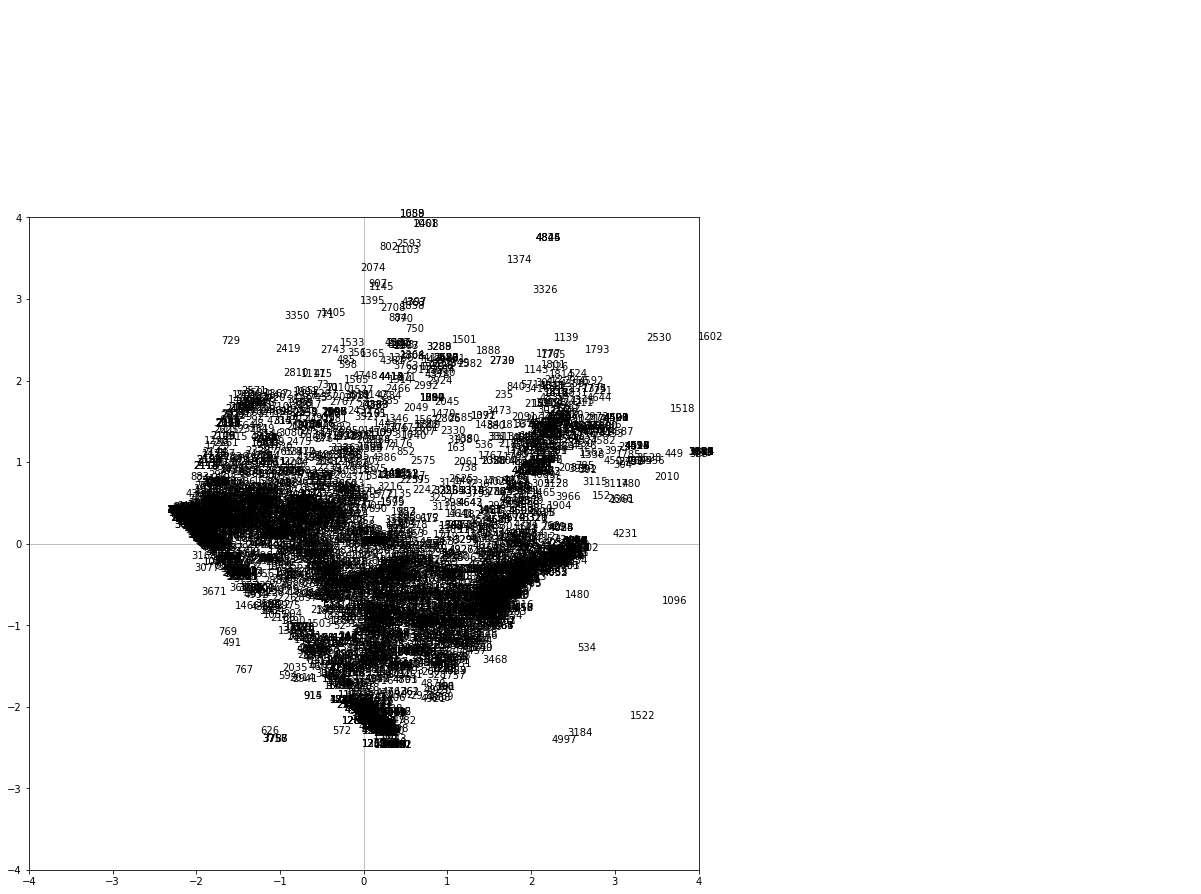

In [46]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-4,4) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()


In [61]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':df.index,'d_i':di}))



        ID           d_i
0        0  2.179900e+00
1        1  1.654089e-29
2        2  1.654089e-29
3        3  9.540636e+00
4        4  7.486118e-01
...    ...           ...
4995  4995  1.654089e-29
4996  4996  2.187788e+00
4997  4997  1.780280e+01
4998  4998  7.014178e+00
4999  4999  7.014178e+00

[5000 rows x 2 columns]


In [62]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p-1):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))


        id    COS2_1    COS2_2
0        0  0.012187  0.573225
1        1  0.003056  0.463140
2        2  0.089904  0.021623
3        3  0.264867  0.159994
4        4  0.945450  0.010955
...    ...       ...       ...
4995  4995  0.031554  0.707214
4996  4996  0.881803  0.015901
4997  4997  0.282917  0.334852
4998  4998  0.001691  0.783546
4999  4999  0.001691  0.783546

[5000 rows x 3 columns]


Conformément à la théorie, pour chaque individu, la somme des COS² sur l’ensemble des 
facteurs est égale à 1.

In [63]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))


[1.         0.49174563 0.36616957 ... 1.         1.         1.        ]


Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le 
champ .components_

In [64]:
#le champ components_ de l'objet ACP
print(acp.components_)


[[ 0.70419274  0.62349428  0.28524993  0.18439076]
 [-0.03830274  0.15987609 -0.70249971  0.69243534]
 [ 0.05331988 -0.50592085  0.5415989   0.66923219]
 [-0.7069671   0.57422872  0.36303893  0.19662562]]


In [65]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p-1,p-1))
for k in range(p-1):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs 
print(corvar)

[[ 0.94716584 -0.04212347  0.0471992  -0.31444352]
 [ 0.83862336  0.17582387 -0.44784532  0.25540439]
 [ 0.38367193 -0.7725747   0.47942782  0.16147179]
 [ 0.24801254  0.7615064   0.59240986  0.08745478]]


In [66]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':df[['energy_100g','fat_100g', 'carbohydrates_100g', 'proteins_100g']].columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                   id     COR_1     COR_2
0         energy_100g  0.947166 -0.042123
1            fat_100g  0.838623  0.175824
2  carbohydrates_100g  0.383672 -0.772575
3       proteins_100g  0.248013  0.761506


Nous pouvons dessiner maintenant le cercle des corrélations

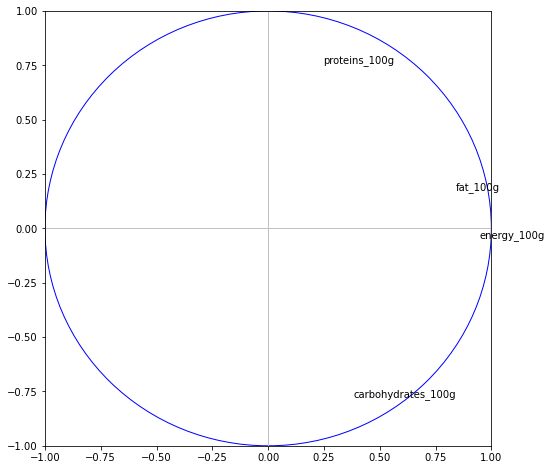

In [67]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p-1):
    plt.annotate(df[['energy_100g','fat_100g', 'carbohydrates_100g', 'proteins_100g']].columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()
